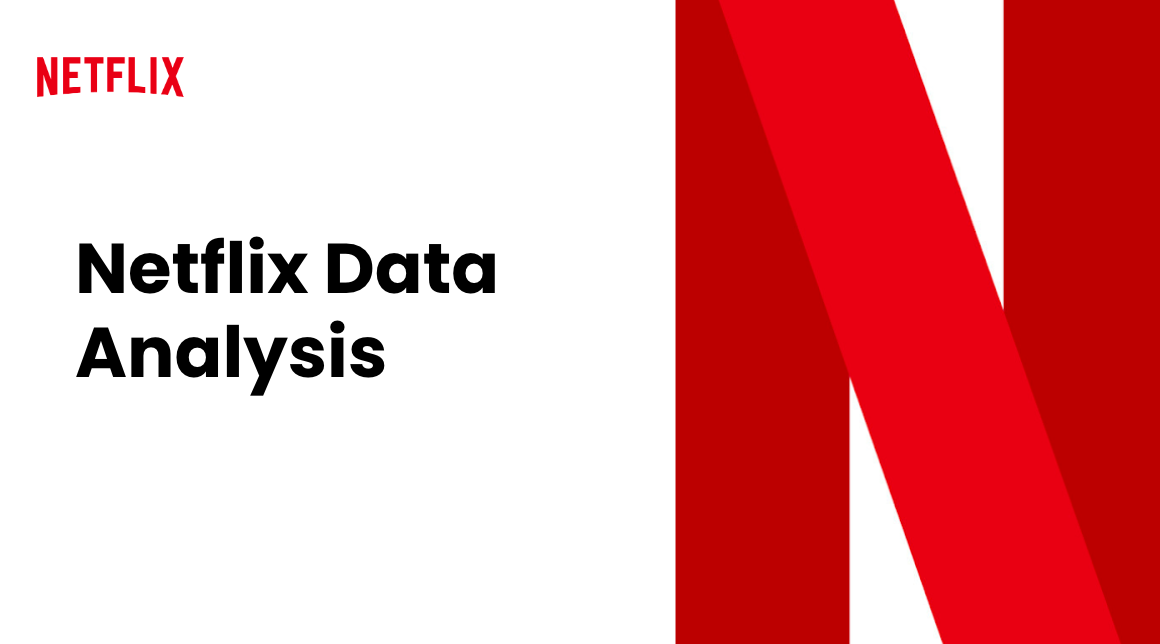

### Importing Libraries

In [507]:
!pip install circlify

In [508]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns
import circlify

### Reading the data

In [509]:
#Reading the data
netflix = pd.read_csv('/kaggle/input/netflix-imdb-data/netflix_titles.csv')

In [510]:
netflix.shape

(8807, 12)

In [511]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [512]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [513]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Observations:**

1. There is missing values present in this data particularly in director, cast, country, date_added, rating and duration columns.
2. There are 8807 unique rows in this data comprising 8807 movies/tv shows.
3. It has 12 features in each row.

### Data Cleaning

In [514]:
#Filling the missing values
netflix['rating'] = netflix['rating'].fillna('Missing')
netflix['date_added'] = netflix['date_added'].fillna('Missing')
netflix['director'] = netflix['director'].fillna('Missing')
netflix['cast'] = netflix['cast'].fillna('Missing')

In [515]:
netflix['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [516]:
#fixing the duration column
netflix[netflix['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [517]:
for i in netflix[netflix['duration'].isna()].index:
    netflix.at[i,'duration'] = netflix.at[i,'rating']
    netflix.at[i,'rating'] = np.nan

In [518]:
netflix['duration'] = netflix['duration'].apply(lambda x: str(x).split()[0])
netflix['duration'] = netflix['duration'].astype(int)

### Joining Netflix data with IMDB

In [519]:
#importing imdb dataset taken from this analysis: https://github.com/sahildit/IMDB-Movies-Extensive-Dataset-Analysis/tree/master/data1

imdb_ratings=pd.read_csv('/kaggle/input/netflix-imdb-data/IMDb ratings.csv',usecols=['weighted_average_vote', 'total_votes'])
imdb_titles=pd.read_csv('/kaggle/input/netflix-imdb-data/IMDb movies.csv', usecols=['title', 'director', 'actors', 'description', 'country', 'genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'total_votes':imdb_ratings.total_votes,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'director_imdb':imdb_titles.director,
                       'actors': imdb_titles.actors,
                       'imdb_desc':imdb_titles.description,
                       'imdb_country':imdb_titles.country,
                       'imdb_genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','total_votes','Rating'], inplace=True)
ratings.shape

(85855, 8)

In [520]:
netflix.shape

(8807, 12)

In [521]:
ratings = ratings.drop_duplicates(subset = 'Title')

In [522]:
netflix = netflix.drop_duplicates(subset = 'title')

In [523]:
ratings = ratings.dropna()

In [524]:
ratings[ratings['director_imdb'].str.contains('Christopher Nolan')]

,Title,total_votes,Rating,director_imdb,actors,imdb_desc,imdb_country,imdb_genre
33306,Following,84550,7.5,Christopher Nolan,"Jeremy Theobald, Alex Haw, Lucy Russell, John ...",A young writer who follows strangers for mater...,UK,"Crime, Mystery, Thriller"
36475,Memento,1098879,8.4,Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",A man with short-term memory loss attempts to ...,USA,"Mystery, Thriller"
43935,Batman Begins,1278075,8.2,Christopher Nolan,"Christian Bale, Michael Caine, Liam Neeson, Ka...","After training with his mentor, Batman begins ...","USA, UK","Action, Adventure"
48078,Il cavaliere oscuro,2241615,9.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,"USA, UK","Action, Crime, Drama"
48754,The Prestige,1155723,8.5,Christopher Nolan,"Hugh Jackman, Christian Bale, Michael Caine, P...","After a tragic accident, two stage magicians e...","UK, USA","Drama, Mystery, Sci-Fi"
50294,Interstellar,1449256,8.6,Christopher Nolan,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",A team of explorers travel through a wormhole ...,"USA, UK, Canada","Adventure, Drama, Sci-Fi"
57234,Il cavaliere oscuro - Il ritorno,1480582,8.4,Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",Eight years after the Joker's reign of anarchy...,"UK, USA","Action, Adventure"
57475,Inception,2002816,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,"USA, UK","Action, Adventure, Sci-Fi"
76459,Dunkirk,531422,7.9,Christopher Nolan,"Fionn Whitehead, Damien Bonnard, Aneurin Barna...","Allied soldiers from Belgium, the British Empi...","UK, Netherlands, France, USA","Action, Drama, History"
81088,Tenet,60922,7.9,Christopher Nolan,"Elizabeth Debicki, Robert Pattinson, John Davi...","Armed with only one word, Tenet, and fighting ...","UK, USA","Action, Sci-Fi"


In [525]:
#joining netflix data with imdb

netflix=netflix.merge(ratings,right_on='Title',left_on='title',how='left')
netflix=netflix.sort_values(by='Rating', ascending=False)

In [526]:
netflix.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country           831
date_added          0
release_year        0
rating              3
duration            0
listed_in           0
description         0
Title            6447
total_votes      6447
Rating           6447
director_imdb    6447
actors           6447
imdb_desc        6447
imdb_country     6447
imdb_genre       6447
dtype: int64

In [527]:
netflix.shape

(8807, 20)

In [528]:
#exporting the merged data
netflix.to_csv('netflix_with_imdb_ratings_and_votes.csv')

In [529]:
netflix['country'].value_counts()

United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Italy, Brazil, Greece                               1
Belgium, United Kingdom                             1
Switzerland, United Kingdom, Australia              1
Spain, France, United Kingdom, United States        1
United States, France, South Korea, Indonesia       1
Name: country, Length: 748, dtype: int64

In [530]:
netflix.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country           831
date_added          0
release_year        0
rating              3
duration            0
listed_in           0
description         0
Title            6447
total_votes      6447
Rating           6447
director_imdb    6447
actors           6447
imdb_desc        6447
imdb_country     6447
imdb_genre       6447
dtype: int64

## EDA- Summary

#### Movie and TV Show Distribution

In [531]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

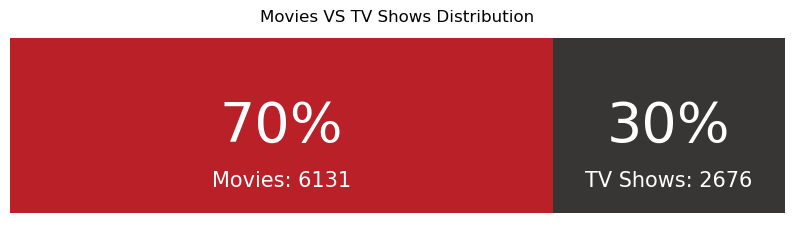

In [532]:
#movie and tv show distribution

movie_tvshow_ratio = pd.DataFrame(((netflix.groupby(['type'])['type'].count()/len(netflix))).round(2)).T

fig, ax = plt.subplots(1,1,figsize=(10, 2.5))

ax.barh(movie_tvshow_ratio.index, movie_tvshow_ratio['Movie'], 
        color='#b20710', alpha=0.9)
ax.barh(movie_tvshow_ratio.index, movie_tvshow_ratio['TV Show'], left=movie_tvshow_ratio['Movie'], 
        color='#221f1f', alpha=0.9)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in movie_tvshow_ratio.index:
    ax.annotate(f"{int(movie_tvshow_ratio['Movie'][i]*100)}%", 
                   xy=(movie_tvshow_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='sans-serif',
                   color='white')
    ax.annotate(f"Movies: {netflix['type'].value_counts()['Movie']}", 
                   xy=(movie_tvshow_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='sans-serif',
                   color='white')

for i in movie_tvshow_ratio.index:
    ax.annotate(f"{int(movie_tvshow_ratio['TV Show'][i]*100)}%", 
                   xy=(movie_tvshow_ratio['Movie'][i]+movie_tvshow_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='sans-serif',
                   color='white')
    ax.annotate(f"TV Shows: {netflix['type'].value_counts()['TV Show']}", 
                   xy=(movie_tvshow_ratio['Movie'][i]+movie_tvshow_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='sans-serif',
                   color='white')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
plt.title('Movies VS TV Shows Distribution')
plt.show()

#### Average Movie and TV Show Content Duration

In [533]:
netflix[netflix['type'] == 'TV Show']['duration'].median()

1.0

In [534]:
netflix[netflix['type'] == 'Movie']['duration'].median()

98.0

#### Longest TV Show

In [535]:
netflix_tv_show = netflix[netflix['type'] == 'TV Show']

In [536]:
netflix_tv_show[netflix_tv_show['duration'] == netflix_tv_show['duration'].max()]['title']

548    Grey's Anatomy
Name: title, dtype: object

#### Countries Distribution

In [537]:
netflix['country'].value_counts(normalize = True, dropna = True)*100

United States                                    35.330993
India                                            12.186560
United Kingdom                                    5.253260
Japan                                             3.071715
South Korea                                       2.494985
                                                   ...    
Italy, Brazil, Greece                             0.012538
Belgium, United Kingdom                           0.012538
Switzerland, United Kingdom, Australia            0.012538
Spain, France, United Kingdom, United States      0.012538
United States, France, South Korea, Indonesia     0.012538
Name: country, Length: 748, dtype: float64

In [538]:
countries = {}

for g in netflix['country'].values:
    g = str(g).split(',')
    for i in g:
        i = re.sub("[^a-zA-Z& ]", "", i.strip())
        if i.lower() not in ['nan']: 
            countries[i.lower()] = 1+countries.get(i.lower(),1)

In [539]:
len(countries.keys())

123

In [540]:
countries_df = pd.DataFrame(list(dict(sorted(countries.items(), key=lambda item: item[1], reverse = True)).items()))

In [541]:
countries_df

,0,1
0,united states,3691
1,india,1047
2,united kingdom,807
3,canada,446
4,france,394
...,...,...
118,sudan,2
119,panama,2
120,uganda,2
121,east germany,2


In [542]:
others = list(countries_df[3:].sum())
others[0] = 'Other Countries'

In [543]:
countries_df = countries_df[:3]

In [544]:
countries_df

,0,1
0,united states,3691
1,india,1047
2,united kingdom,807


In [545]:
countries_df.loc[len(countries_df.index)] = others

/tmp/ipykernel_32/260938237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df.loc[len(countries_df.index)] = others


In [546]:
countries_df

,0,1
0,united states,3691
1,india,1047
2,united kingdom,807
3,Other Countries,4597


In [547]:
countries_df[0]

0      united states
1              india
2     united kingdom
3    Other Countries
Name: 0, dtype: object

In [548]:
countries_df[0][0] = 'United States'
countries_df[0][1] = 'India'
countries_df[0][2] = 'United Kingdom'

/tmp/ipykernel_32/642599480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df[0][0] = 'United States'
/tmp/ipykernel_32/642599480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df[0][1] = 'India'
/tmp/ipykernel_32/642599480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df[0][2] = 'United Kingdom'


In [549]:
countries_df[0]

0      United States
1              India
2     United Kingdom
3    Other Countries
Name: 0, dtype: object

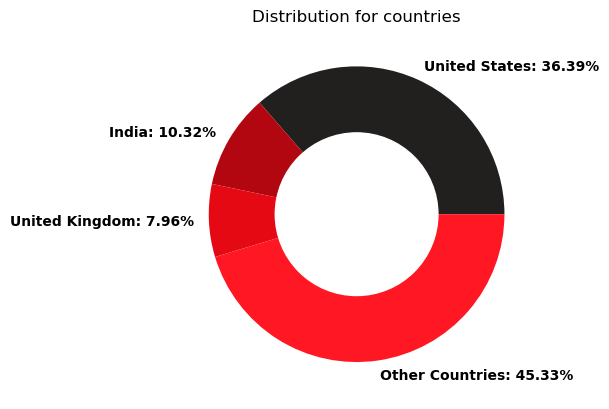

In [550]:
#Drawing donut chart for countries

data = countries_df[1]
total = sum(data)
data_per = data/total*100
explode = (0, 0, 0, 0)

colors = ['#221f1f', '#b20710', '#e50914','#ff1723']

plt.pie(data_per, explode = explode, labels = [f'{countries_df[0][i]}: {round(data_per[i],2)}%' for i in range(len((list(data_per))))], colors = colors, textprops={'fontweight': 'bold'})
circle = plt.Circle( (0,0), 0.55, color='white')
plt.title('Distribution for countries')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Observation:**
Top 3 countries comprise for 55% of the content on Netflix.

#### Most Popular Film Rating

In [551]:
netflix.shape

(8807, 20)

In [552]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,total_votes,Rating,director_imdb,actors,imdb_desc,imdb_country,imdb_genre
7957,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,Schindler's List,1183248.0,8.9,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...","In German-occupied Poland during World War II,...",USA,"Biography, Drama, History"
7802,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,Pulp Fiction,1780147.0,8.9,Quentin Tarantino,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...",USA,"Crime, Drama"
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,Inception,2002816.0,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,"USA, UK","Action, Adventure, Sci-Fi"
6667,s6668,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,"December 1, 2017",2015,TV-14,124,"Dramas, International Movies",Driven by the lessons he learned from his moth...,Eh Janam Tumhare Lekhe,346.0,8.6,Harjit Singh,"Pavan Malhotra, Arjuna Bhalla, Sudhanshu Aggar...",Eh Janam Tumhare Lekhe ~ This life is dedicate...,India,Biography
3312,s3313,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,"November 4, 2019",2019,TV-MA,103,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",Oththa Seruppu Size 7,1902.0,8.6,Parthiban,"Parthiban, Gayathrie, Deepa Venkat",An emotionally unstable murder suspect explain...,India,Drama


In [553]:
netflix['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Missing        4
NC-17          3
UR             3
Name: rating, dtype: int64

**Observation:** TV-MA is the most popular film rating on Netflix

#### Top 3 Genres

In [554]:
#total different genres

genre = {}

for g in netflix['listed_in'].values:
    g = g.split()
    for i in g:
        i = re.sub("[^a-zA-Z& ]", "", i.strip())
        if i.lower() not in ['&','shows','movies','tv']: 
            genre[i.lower()] = 1+genre.get(i.lower(),1)

In [555]:
sum(list(genre.values()))

22546

In [556]:
genre_df = pd.DataFrame(list(dict(sorted(genre.items(), key=lambda item: item[1], reverse = True)).items()))

In [557]:
genre_df.shape

(39, 2)

In [558]:
genre_df[1] = genre_df[1]*100/genre_df[1].sum()

In [559]:
genre_df_copy = genre_df.copy()

In [560]:
genre_df = genre_df[:5]

In [561]:
genre_df

,0,1
0,international,18.202785
1,dramas,14.153287
2,comedies,10.006210
3,action,4.559567
4,adventure,4.559567


In [562]:
genre_df[0] = ['International','Dramas','Comedy','Action','Adventure']

In [563]:
genre_df[1].sum()

51.48141577219906

In [564]:
genre_df = genre_df.rename(columns = {0:'Name',1:"Value"})

In [565]:
genre_df

,Name,Value
0,International,18.202785
1,Dramas,14.153287
2,Comedy,10.006210
3,Action,4.559567
4,Adventure,4.559567


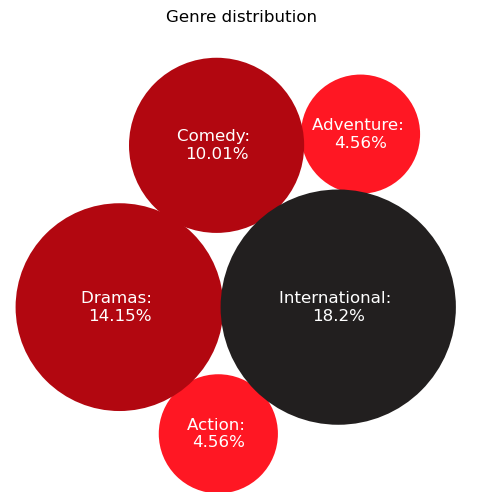

In [566]:
genre_df = genre_df.sort_values('Value').reset_index(drop = True)
circles = circlify.circlify(genre_df['Value'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0, r=1))

fig, ax = plt.subplots(figsize=(6,6))

ax.axis('off')
ax.set_aspect('equal')

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r, )
          for circle in circles)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
plt.title('Genre distribution')

labels = [f"{genre_df['Name'][i]}: \n{round(genre_df['Value'][i],2)}%" for i in range(len(genre_df['Name']))]

colors = ['#ff1723', '#ff1723', '#b20710','#b20710', '#221f1f']
for circle, label, color in zip(circles, labels, colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, linewidth=2, color=color))
    ax.annotate(label, (x, y), va='center', ha='center', size=12, color='white')
plt.show()

**Observation:** Top 5 Genres are International, Action, Adventure, Comedy and Dramas.

#### Average IMDB Score

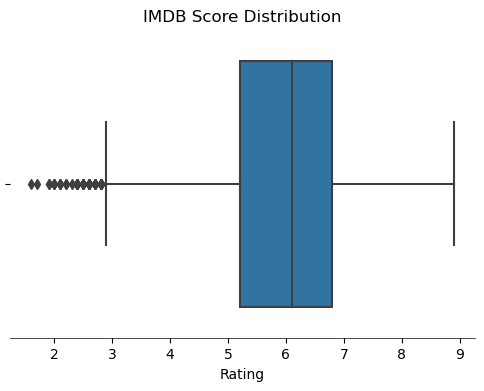

In [567]:
fig, ax = plt.subplots(figsize=(6,4))

sns.boxplot(x='Rating', data=netflix, ax = ax)
plt.title('IMDB Score Distribution')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)

In [568]:
netflix['Rating'].mean()

5.935593220338983

**Observation:** Average IMDB rating on Netflix is 5.93

#### Duration vs Rating

In [569]:
netflix_dropped_missing_ratings = netflix.dropna(subset = 'Rating')

In [570]:
netflix_dropped_missing_ratings.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,total_votes,Rating,director_imdb,actors,imdb_desc,imdb_country,imdb_genre
7957,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,Schindler's List,1183248.0,8.9,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...","In German-occupied Poland during World War II,...",USA,"Biography, Drama, History"
7802,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,Pulp Fiction,1780147.0,8.9,Quentin Tarantino,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...",USA,"Crime, Drama"
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,Inception,2002816.0,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,"USA, UK","Action, Adventure, Sci-Fi"
6667,s6668,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,"December 1, 2017",2015,TV-14,124,"Dramas, International Movies",Driven by the lessons he learned from his moth...,Eh Janam Tumhare Lekhe,346.0,8.6,Harjit Singh,"Pavan Malhotra, Arjuna Bhalla, Sudhanshu Aggar...",Eh Janam Tumhare Lekhe ~ This life is dedicate...,India,Biography
3312,s3313,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,"November 4, 2019",2019,TV-MA,103,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",Oththa Seruppu Size 7,1902.0,8.6,Parthiban,"Parthiban, Gayathrie, Deepa Venkat",An emotionally unstable murder suspect explain...,India,Drama


In [571]:
netflix_dropped_missing_ratings.shape

(2360, 20)

In [572]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
netflix_dropped_missing_ratings['Rating_binned'] = pd.cut(netflix_dropped_missing_ratings['Rating'], bins)

/tmp/ipykernel_32/1171141174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dropped_missing_ratings['Rating_binned'] = pd.cut(netflix_dropped_missing_ratings['Rating'], bins)


In [573]:
netflix_movies_usa = netflix_dropped_missing_ratings[(netflix_dropped_missing_ratings['type'] == 'Movie') & (netflix_dropped_missing_ratings['country'].str.contains('United States'))]
netflix_movies_india = netflix_dropped_missing_ratings[(netflix_dropped_missing_ratings['type'] == 'Movie') & (netflix_dropped_missing_ratings['country'].str.contains('India'))]
netflix_movies_uk = netflix_dropped_missing_ratings[(netflix_dropped_missing_ratings['type'] == 'Movie') & (netflix_dropped_missing_ratings['country'].str.contains('United Kingdom'))]

In [574]:
netflix_movies_usa.shape, netflix_movies_india.shape, netflix_movies_uk.shape

((925, 21), (635, 21), (190, 21))

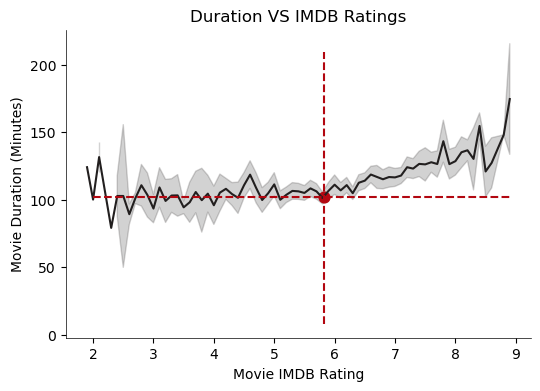

In [575]:
#Duration vs Ratings graph

fig, ax = plt.subplots(figsize=(6,4))

sns.lineplot(data=pd.concat([netflix_movies_usa,netflix_movies_india,netflix_movies_uk]), x='Rating', y='duration', err_style="band", errorbar=("se", 2), ax = ax, color = '#221f1f')
wgt=netflix_movies_usa['Rating']
ax.hlines(y=netflix_movies_usa['duration'].mean(), xmin=wgt.min(), xmax=wgt.max(), 
          colors='#b20710', linestyles='dashed', lw=1.5)


mpg=netflix_movies_usa['duration']
ax.vlines(x=netflix_movies_usa['Rating'].mean(), ymin=mpg.min(), ymax=mpg.max(), 
          colors='#b20710', linestyles='dashed', lw=1.5)

plt.ylabel('Movie Duration (Minutes)')
plt.xlabel('Movie IMDB Rating')

plt.title('Duration VS IMDB Ratings')

ax.scatter(wgt.mean(), mpg.mean(), c='#b20710', s=60)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

**Observation:** Movie Duration tend to show positive correlation with IMDB Ratings.

In [576]:
netflix_movies_usa['duration'].mean(), netflix_movies_usa['Rating'].mean()

(101.82810810810811, 5.823567567567568)

In [577]:
netflix_movies_india['duration'].mean(), netflix_movies_india['Rating'].mean()

(129.48661417322833, 6.2497637795275605)

In [578]:
netflix_movies_uk['duration'].mean(), netflix_movies_uk['Rating'].mean()

(105.73157894736842, 5.9652631578947375)

In [579]:
netflix[netflix['type']=='Movie']['duration'].mean(), netflix[netflix['type']=='Movie']['Rating'].mean()

(99.56499755341706, 5.970892018779342)

#### Directors with top IMDB Score in USA

In [580]:
netflix.shape

(8807, 20)

In [581]:
netflix_dirs = netflix.copy()

In [582]:
netflix_dirs = netflix_dirs.dropna(subset = 'country')
netflix_dirs = netflix_dirs[netflix_dirs['country'].str.contains('United States')]

netflix_dirs = netflix_dirs[netflix_dirs['type'] == 'Movie']

In [583]:
netflix_dirs.shape

(2752, 20)

In [584]:
netflix_dirs.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,total_votes,Rating,director_imdb,actors,imdb_desc,imdb_country,imdb_genre
7957,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,Schindler's List,1183248.0,8.9,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...","In German-occupied Poland during World War II,...",USA,"Biography, Drama, History"
7802,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,Pulp Fiction,1780147.0,8.9,Quentin Tarantino,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...",USA,"Crime, Drama"
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,Inception,2002816.0,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,"USA, UK","Action, Adventure, Sci-Fi"
6143,s6144,Movie,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,"November 1, 2019",1998,R,119,Dramas,A neo-Nazi gets sent to prison for murder and ...,American History X,1014218.0,8.5,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",A former neo-nazi skinhead tries to prevent hi...,USA,Drama
8017,s8018,Movie,Silencer,Timothy Woodward Jr.,"Johnny Messner, Danny Trejo, Tito Ortiz, Chuck...",United States,"December 3, 2018",2018,TV-MA,88,"Action & Adventure, Independent Movies",When a drug lord kidnaps his girlfriend’s daug...,Silencer,466.0,8.5,Priyanandanan,"Irshad, Lal, Binoy Nambala, Ramu, Meera Vasude...","Due to an unfortunate event, Shanthanu leaves ...",India,Drama


In [585]:
# #total different directors and cast

director = {}

for g in netflix_dirs['director'].values:
    g = g.split(',')
    for i in g:
        i = re.sub("[^a-zA-Z& ]", "", i.strip())
        if i not in ['&','shows','nan','missing', 'Missing']: 
            director[i] = 1+director.get(i,1)

In [586]:
director = dict(sorted(director.items(), key=lambda item: item[1], reverse = True))

In [587]:
director

{'Jay Karas': 16,
 'Marcus Raboy': 15,
 'Martin Scorsese': 13,
 'Jay Chapman': 13,
 'Steven Spielberg': 12,
 'Don Michael Paul': 11,
 'Shannon Hartman': 10,
 'Robert Rodriguez': 9,
 'Troy Miller': 9,
 'Quentin Tarantino': 8,
 'Clint Eastwood': 8,
 'Noah Baumbach': 8,
 'Ron Howard': 8,
 'McG': 8,
 'Lasse Hallstrm': 8,
 'Leslie Small': 8,
 'Lance Bangs': 8,
 'Ryan Polito': 8,
 'David Fincher': 7,
 'Steven Soderbergh': 7,
 'Robert Luketic': 7,
 'Steve Brill': 7,
 'Kevin Smith': 7,
 'Vlad Yudin': 7,
 'William Lau': 7,
 'John G Avildsen': 6,
 'Martin Campbell': 6,
 'Lilly Wachowski': 6,
 'Lana Wachowski': 6,
 'Lynn Shelton': 6,
 'Jesse V Johnson': 6,
 'Ava DuVernay': 6,
 'Jay Roach': 6,
 'Spike Lee': 6,
 'Vince Marcello': 6,
 'Andy Tennant': 6,
 'Manny Rodriguez': 6,
 'Michael Simon': 6,
 'Ishi Rudell': 6,
 'Oliver Stone': 5,
 'Paul Thomas Anderson': 5,
 'Antoine Fuqua': 5,
 'Jeremy Saulnier': 5,
 'Sean McNamara': 5,
 'Antonio Campos': 5,
 'Peter Farrelly': 5,
 'Gregory Hoblit': 5,
 'Sam Li

In [588]:
director = pd.DataFrame(director, index = ['Count']).T.reset_index()[:100]

In [589]:
director = director.sort_values(by=['Count'], ascending = False).reset_index(drop= True)
director = director.rename(columns = {'index':'Director'})

In [590]:
director.head()

,Director,Count
0,Jay Karas,16
1,Marcus Raboy,15
2,Martin Scorsese,13
3,Jay Chapman,13
4,Steven Spielberg,12


In [591]:
for row in director.itertuples():
    x = ratings[ratings['director_imdb'].str.contains(row[1].split(' & ')[0])]
    director.at[row[0],'Rating'] = x['Rating'].mean()
    director.at[row[0],'total_votes'] = x['total_votes'].mean()

In [592]:
director = director.dropna(subset = 'Rating')

In [593]:
director = director.sort_values(by = 'Count', ascending = False).reset_index(drop = True)[:15]

In [594]:
director

,Director,Count,Rating,total_votes
0,Jay Karas,16,5.350000,1394.500000
1,Marcus Raboy,15,5.466667,8968.333333
2,Martin Scorsese,13,7.509524,311525.190476
3,Jay Chapman,13,6.450000,213.000000
4,Steven Spielberg,12,7.365625,352286.031250
5,Don Michael Paul,11,3.900000,6929.000000
6,Robert Rodriguez,9,5.846667,113180.800000
7,Troy Miller,9,5.033333,24741.000000
8,Quentin Tarantino,8,7.869231,707066.230769
9,Clint Eastwood,8,6.928571,103106.514286


In [595]:
director[director['Rating'] >= 7].index

Int64Index([2, 4, 8], dtype='int64')

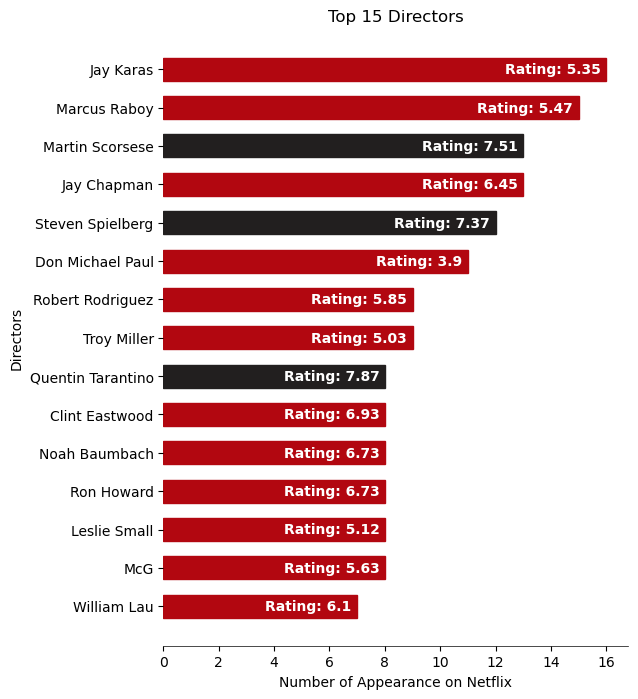

In [596]:
#Graph showing top 15 directors
fig, ax = plt.subplots(figsize=(6,8))

x = np.arange(1,16)

bar_plot = ax.barh(x, director['Count'][::-1], height=.6, color='#b20710', label = 'total_votes')

#call the pathches
for i,rect in enumerate(bar_plot.patches):
    if 14-i in director[director['Rating'] >= 7].index: 
        rect.set_color('#221f1f')
    else:
        rect.set_color('#b20710')

#setting labels
ax.set_ylabel('Directors')
ax.set_xlabel("Number of Appearance on Netflix")

#setting ticks   
ax.set_yticks(np.arange(1,16))
ax.set_yticklabels(director['Director'][::-1]) 

for i, v in enumerate(director['Rating']):
    ax.text(director.loc[i,'Count']-.2, 14.99-i, f'Rating: {str(round(v,2))}', color='white', fontsize=10, ha='right', va='center', fontweight = 'bold')

plt.title('Top 15 Directors')

#hiding frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

**Observation:** There are some directors which focus on quantity over quality content. For instance, Jay Karas has the most content on Netflix but the IMDB rating of his content is less than the average IMDB rating on content on Netflix. Whereas director's like Martin Scorsese prefer to make less but higher rating content. Netflix should focus more on director's who make quality content to boost their average IMDB ratings.

In [597]:
netflix.shape

(8807, 20)

In [598]:
dir_favourites = {}

for d in ['Martin Scorsese', 'Steven Spielberg', 'Quentin Tarantino']:

    dir_cast = netflix[netflix['director'].str.contains(d)].reset_index(drop= True)

    director = {}

    for g in dir_cast['cast'].values:
        g = g.split(',')
        for i in g:
            i = re.sub("[^a-zA-Z& ]", "", i.strip())
            if i not in ['&','shows','nan','missing', 'Missing']: 
                director[i] = 1+director.get(i,1)
    
    director = dict(sorted(director.items(), key=lambda item: item[1], reverse = True)[:3])
    dir_favourites[d] = director

Text(0.5, 0, 'Number of Appearance Together on Netflix')

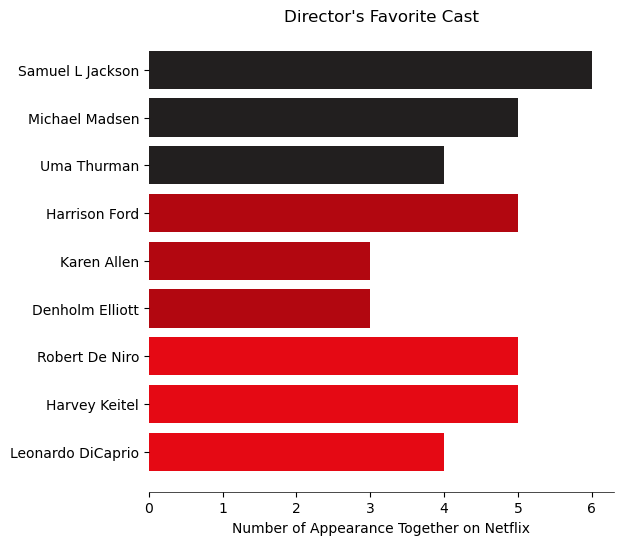

In [599]:
#Bar plot showing director's favorite cast

fig, ax = plt.subplots(figsize=(6,6))

ax.barh(list(dir_favourites['Martin Scorsese'].keys())[::-1], list(dir_favourites['Martin Scorsese'].values())[::-1], color = '#e50914')
ax.barh(list(dir_favourites['Steven Spielberg'].keys())[::-1], list(dir_favourites['Steven Spielberg'].values())[::-1], color = '#b20710')
ax.barh(list(dir_favourites['Quentin Tarantino'].keys())[::-1], list(dir_favourites['Quentin Tarantino'].values())[::-1], color = '#221f1f')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)

plt.title('Director\'s Favorite Cast')

ax.set_xlabel("Number of Appearance Together on Netflix")

**Observation:** Some of the favorite cast for 3 directors is shown above.

#### Wordcloud for Description

In [600]:
ratings = ratings[ratings['imdb_country']=='USA']

In [601]:
netflix = netflix.dropna(subset = 'description')

In [602]:
ratings_low = netflix[(netflix['country'].str.contains('United States')) & (netflix['Rating'] <= 5)] # #ratings[ratings['Rating']<=5]
ratings_high = netflix[(netflix['country'].str.contains('United States')) & (netflix['Rating'] >= 7)] #ratings[ratings['Rating']>=7]

In [603]:
ratings_low.shape, ratings_high.shape

((228, 20), (155, 20))

In [604]:
import matplotlib

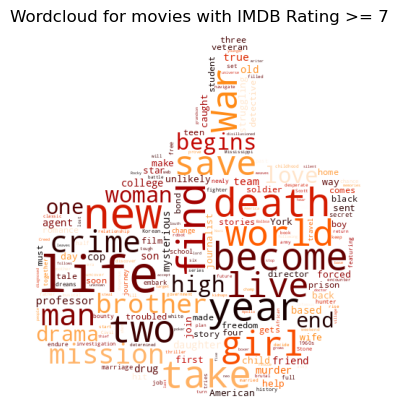

In [605]:
text = ratings_high['description'].values

mask = np.flipud(np.array(Image.open("/kaggle/input/netflix-imdb-data/18123.png")))

def transform_zeros(val):
    if val == 0: 
       return 255
    else:
       return 0

maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

mask = maskable_image

stop_words = ["young", 'family'] + list(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                      max_font_size = 70, min_word_length =3, colormap='gist_heat', stopwords = stop_words,
                      collocations=False, mask = mask).generate(str(text))

plt.title('Wordcloud for movies with IMDB Rating >= 7')

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Observation:** People tend to give higher rating to 'dark' content on Netflix.

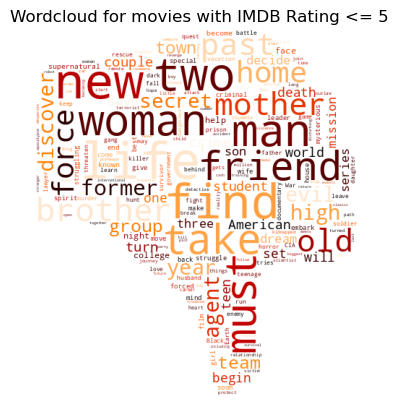

In [606]:
text = ratings_low['description'].values

mask = np.array(Image.open("/kaggle/input/netflix-imdb-data/18123.png"))

def transform_zeros(val):
    if val == 0: 
       return 255
    else:
       return 0

maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

mask = maskable_image

stop_words = ["young", 'family'] + list(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                      max_font_size = 70, min_word_length =3, colormap='gist_heat', stopwords = stop_words,
                      collocations=False, mask = mask).generate(str(text))

plt.title('Wordcloud for movies with IMDB Rating <= 5')

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Observation:** People tend to give lower rating to 'Family' related content on Netflix.

#### Genre over the years

In [607]:
netflix.shape

(8807, 20)

In [608]:
netflix['date_added']=netflix['date_added'].str.split(', ', expand=True)[1]

In [609]:
netflix['date_added'] = pd.to_datetime(netflix['date_added']).dt.year

In [610]:
netflix.shape

(8807, 20)

In [611]:
genre_df = genre_df_copy.rename(columns = {0:'Name',1:'Value'})[:6]

In [612]:
genre_df = genre_df.drop(4,axis = 0).reset_index(drop = True)

In [613]:
genre_df

,Name,Value
0,international,18.202785
1,dramas,14.153287
2,comedies,10.006210
3,action,4.559567
4,romantic,4.377717


In [614]:
genre_df['Name'].values

array(['international', 'dramas', 'comedies', 'action', 'romantic'],
      dtype=object)

In [615]:
gen_international = netflix[netflix['listed_in'].str.contains('International')]
gen_dramas = netflix[netflix['listed_in'].str.contains('Dramas')]
gen_comedy = netflix[netflix['listed_in'].str.contains('Comedy')]
gen_action = netflix[netflix['listed_in'].str.contains('Action')]
gen_romantic = netflix[netflix['listed_in'].str.contains('romantic')]

In [616]:
gen_top5 = pd.concat([gen_international,gen_dramas,gen_comedy,gen_action,gen_romantic]).drop_duplicates()

In [617]:
gen_top5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,total_votes,Rating,director_imdb,actors,imdb_desc,imdb_country,imdb_genre
6667,s6668,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,2017.0,2015,TV-14,124,"Dramas, International Movies",Driven by the lessons he learned from his moth...,Eh Janam Tumhare Lekhe,346.0,8.6,Harjit Singh,"Pavan Malhotra, Arjuna Bhalla, Sudhanshu Aggar...",Eh Janam Tumhare Lekhe ~ This life is dedicate...,India,Biography
3312,s3313,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,2019.0,2019,TV-MA,103,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",Oththa Seruppu Size 7,1902.0,8.6,Parthiban,"Parthiban, Gayathrie, Deepa Venkat",An emotionally unstable murder suspect explain...,India,Drama
2016,s2017,Movie,Ani... Dr. Kashinath Ghanekar,Abhijeet Deshpande,"Subodh Bhave, Vaidehi Parshurami, Nandita Patk...",India,2020.0,2018,TV-14,157,"Dramas, International Movies",From his singular career to his personal demon...,Ani... Dr. Kashinath Ghanekar,705.0,8.6,Abhijeet Shirish Deshpande,"Subodh Bhave, Sumeet Raghvan, Sonali Kulkarni,...",This film is a biopic of Dr. Kashinath Ghaneka...,India,Drama
7224,s7225,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,2019.0,1972,TV-14,115,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...,Koshish,1434.0,8.6,Gulzar,"Sanjeev Kumar, Jaya Bachchan, Asrani, Seema De...",A speech and hearing-impaired couple persists ...,India,Drama
6864,s6865,Movie,Gol Maal,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,2019.0,1979,TV-PG,137,"Classic Movies, Comedies, International Movies",When circumstances at work compel Ram to prete...,Gol Maal,17381.0,8.6,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Sh...",A man's simple lie to secure his job escalates...,India,"Comedy, Romance"


In [618]:
#getting different columns for genre

genres = set()

for row in gen_top5.itertuples():
    for i in row[11].split():
        i = re.sub("[^a-zA-Z& ]", "", i.strip()).lower()
        if i in genre_df['Name'].values:
            genres.add(i)
            gen_top5.at[row[0],i] = 1

In [619]:
gen_top5[list(genres)] = gen_top5[list(genres)].fillna(value=0)

In [620]:
gen_top5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,director_imdb,actors,imdb_desc,imdb_country,imdb_genre,dramas,international,romantic,comedies,action
6667,s6668,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,2017.0,2015,TV-14,124,...,Harjit Singh,"Pavan Malhotra, Arjuna Bhalla, Sudhanshu Aggar...",Eh Janam Tumhare Lekhe ~ This life is dedicate...,India,Biography,1.0,1.0,0.0,0.0,0.0
3312,s3313,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,2019.0,2019,TV-MA,103,...,Parthiban,"Parthiban, Gayathrie, Deepa Venkat",An emotionally unstable murder suspect explain...,India,Drama,1.0,1.0,0.0,0.0,0.0
2016,s2017,Movie,Ani... Dr. Kashinath Ghanekar,Abhijeet Deshpande,"Subodh Bhave, Vaidehi Parshurami, Nandita Patk...",India,2020.0,2018,TV-14,157,...,Abhijeet Shirish Deshpande,"Subodh Bhave, Sumeet Raghvan, Sonali Kulkarni,...",This film is a biopic of Dr. Kashinath Ghaneka...,India,Drama,1.0,1.0,0.0,0.0,0.0
7224,s7225,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,2019.0,1972,TV-14,115,...,Gulzar,"Sanjeev Kumar, Jaya Bachchan, Asrani, Seema De...",A speech and hearing-impaired couple persists ...,India,Drama,0.0,1.0,1.0,0.0,0.0
6864,s6865,Movie,Gol Maal,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,2019.0,1979,TV-PG,137,...,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Sh...",A man's simple lie to secure his job escalates...,India,"Comedy, Romance",0.0,1.0,0.0,1.0,0.0


In [621]:
gen_top5 = gen_top5.groupby('date_added').sum()[genre_df['Name'].values]

/tmp/ipykernel_32/2934485830.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_top5 = gen_top5.groupby('date_added').sum()[genre_df['Name'].values]


In [622]:
gen_top5 = gen_top5[2010:]

In [623]:
gen_top5.columns

Index(['international', 'dramas', 'comedies', 'action', 'romantic'], dtype='object')

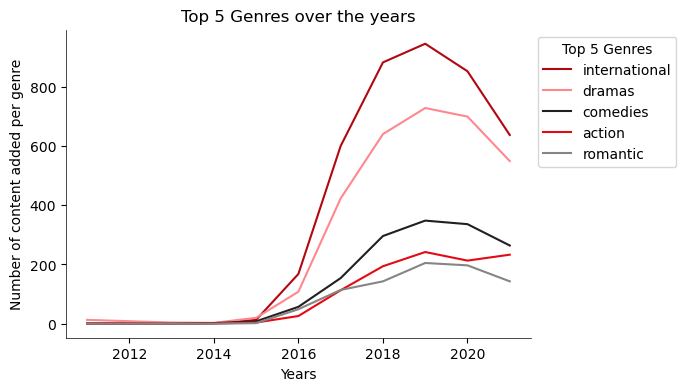

In [624]:
#Line plot for top 5 genres
fig, ax = plt.subplots(figsize=(6,4))

bar_labels = gen_top5.columns
color = ['#B20710','#ff878e', '#221F1F', '#e50914', '#858585']

for idx, i in enumerate(gen_top5.columns):
    ax.plot(gen_top5[i], label=bar_labels[idx], color = color[idx])

ax.legend(title='Top 5 Genres', bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.tick_params(left = True)

plt.title('Top 5 Genres over the years')

plt.xlabel('Years')
plt.ylabel('Number of content added per genre')

plt.show()

**Observation:** International and Dramas Genre are among the most popular genres in the recent years.

In [625]:
netflix[netflix['listed_in'].str.contains('International')]['Rating'].mean()

6.074412955465587

In [626]:
netflix[netflix['listed_in'].str.contains('Dramas')]['Rating'].mean()

6.227104247104247

In [627]:
netflix[netflix['listed_in'].str.contains('Comedies')]['Rating'].mean()

5.892795389048992

In [628]:
netflix[netflix['listed_in'].str.contains('Action')]['Rating'].mean()

5.871428571428571

In [629]:
netflix[netflix['listed_in'].str.contains('Romantic')]['Rating'].mean()

5.923630136986302

#### TV Ratings over the years

In [630]:
netflix['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Missing        4
NC-17          3
UR             3
Name: rating, dtype: int64

In [631]:
netflix = netflix[netflix['rating'].isin(netflix['rating'].value_counts()[:5].index)]
netflix = netflix[netflix['date_added'] >= 2013]

In [632]:
netflix.shape

(7493, 20)

In [633]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,total_votes,Rating,director_imdb,actors,imdb_desc,imdb_country,imdb_genre
7957,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018.0,1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,Schindler's List,1183248.0,8.9,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...","In German-occupied Poland during World War II,...",USA,"Biography, Drama, History"
7802,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019.0,1994,R,154,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,Pulp Fiction,1780147.0,8.9,Quentin Tarantino,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...",USA,"Crime, Drama"
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2021.0,2010,PG-13,148,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,Inception,2002816.0,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,"USA, UK","Action, Adventure, Sci-Fi"
6667,s6668,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,2017.0,2015,TV-14,124,"Dramas, International Movies",Driven by the lessons he learned from his moth...,Eh Janam Tumhare Lekhe,346.0,8.6,Harjit Singh,"Pavan Malhotra, Arjuna Bhalla, Sudhanshu Aggar...",Eh Janam Tumhare Lekhe ~ This life is dedicate...,India,Biography
3312,s3313,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,2019.0,2019,TV-MA,103,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",Oththa Seruppu Size 7,1902.0,8.6,Parthiban,"Parthiban, Gayathrie, Deepa Venkat",An emotionally unstable murder suspect explain...,India,Drama


In [634]:
x = pd.crosstab(index=netflix['rating'].values, columns=netflix['date_added'].values)

In [635]:
x = x*100/x.sum()

In [636]:
t = x.T

In [637]:
t

row_0,PG-13,R,TV-14,TV-MA,TV-PG
col_0,,,,,
2013.0,0.000000,0.000000,40.000000,60.000000,0.000000
2014.0,0.000000,0.000000,11.111111,66.666667,22.222222
2015.0,3.571429,5.357143,25.000000,51.785714,14.285714
2016.0,1.818182,4.242424,29.696970,49.090909,15.151515
2017.0,2.519380,6.395349,31.589147,43.217054,16.279070
2018.0,3.612815,8.793456,30.743013,44.308112,12.542604
2019.0,7.622812,11.744777,27.893845,41.558442,11.180124
2020.0,7.790549,12.005109,28.033206,42.848020,9.323116
2021.0,11.698718,15.224359,26.121795,39.182692,7.772436


<Figure size 1500x600 with 0 Axes>

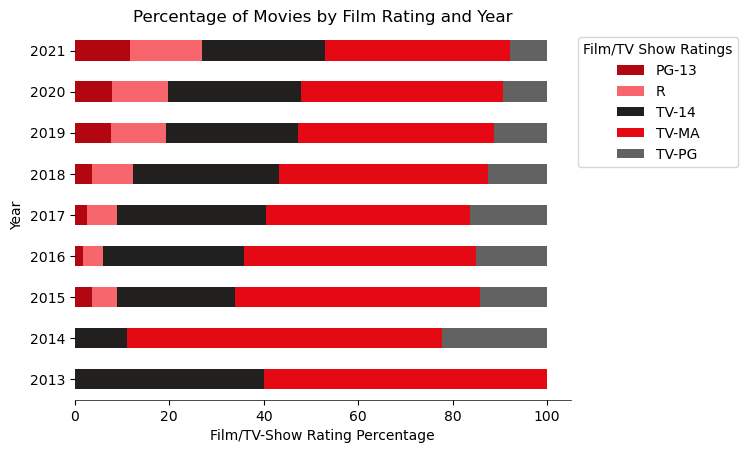

In [638]:
#Stacked bar plot for Percentage of Movies by Film Rating and Year

plt.figure(figsize=(15, 6))
ax = t.plot(kind='barh', stacked=True,color = ['#B20710','#f7656d', '#221F1F', '#e50914', '#636262'])
plt.xlabel('Film/TV-Show Rating Percentage')
plt.ylabel('Year')
plt.title('Percentage of Movies by Film Rating and Year')
plt.legend(title='Film/TV Show Ratings', bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)

ax.set_yticklabels([2013,2014,2015, 2016,2017,2018, 2019,2020,2021])
plt.tick_params(left = True)

plt.show()

**Observation:** PG-13 and R rated movies are increasing in the recent years whereas TV-PG rated shows are on a decline.

In [639]:
netflix[netflix['rating'] == 'TV-MA']['Rating'].mean()

5.757464454976304

In [640]:
netflix[netflix['rating'] == 'PG-13']['Rating'].mean()

6.173366834170854

In [641]:
netflix[netflix['rating'] == 'R']['Rating'].mean()

6.017962466487935

In [642]:
netflix[netflix['rating'] == 'TV-PG']['Rating'].mean()

6.0636363636363635

In [643]:
netflix[netflix['rating'] == 'TV-14']['Rating'].mean()

6.043968253968254

### Highest and Lowest Rated Movie Genres by Country

In [644]:
netflix=pd.read_csv("/kaggle/input/netflix-imdb-data/netflix_with_imdb_ratings_and_votes.csv")

In [645]:
netflix.shape

(8807, 21)

In [646]:
netflix_drop=netflix.dropna(subset=["country"])
netflix_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7976 non-null   int64  
 1   show_id        7976 non-null   object 
 2   type           7976 non-null   object 
 3   title          7976 non-null   object 
 4   director       7976 non-null   object 
 5   cast           7976 non-null   object 
 6   country        7976 non-null   object 
 7   date_added     7976 non-null   object 
 8   release_year   7976 non-null   int64  
 9   rating         7973 non-null   object 
 10  duration       7976 non-null   int64  
 11  listed_in      7976 non-null   object 
 12  description    7976 non-null   object 
 13  Title          2309 non-null   object 
 14  total_votes    2309 non-null   float64
 15  Rating         2309 non-null   float64
 16  director_imdb  2309 non-null   object 
 17  actors         2309 non-null   object 
 18  imdb_des

In [647]:
netflix_drop2=netflix_drop.dropna(subset=["Rating"])

In [648]:
netflix_drop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 0 to 2359
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2309 non-null   int64  
 1   show_id        2309 non-null   object 
 2   type           2309 non-null   object 
 3   title          2309 non-null   object 
 4   director       2309 non-null   object 
 5   cast           2309 non-null   object 
 6   country        2309 non-null   object 
 7   date_added     2309 non-null   object 
 8   release_year   2309 non-null   int64  
 9   rating         2309 non-null   object 
 10  duration       2309 non-null   int64  
 11  listed_in      2309 non-null   object 
 12  description    2309 non-null   object 
 13  Title          2309 non-null   object 
 14  total_votes    2309 non-null   float64
 15  Rating         2309 non-null   float64
 16  director_imdb  2309 non-null   object 
 17  actors         2309 non-null   object 
 18  imdb_des

In [649]:
netflix_drop2['country'].value_counts().head(10)

United States                    711
India                            602
United Kingdom                    84
Canada                            51
Philippines                       49
Indonesia                         31
South Korea                       29
United Kingdom, United States     26
Nigeria                           23
Spain                             22
Name: country, dtype: int64

In [650]:
top5 = netflix_drop2[netflix_drop2['country'].isin(['United States', 'India', 'United Kingdom', 'Canada', 'Phillipines'])]
top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 2356
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1448 non-null   int64  
 1   show_id        1448 non-null   object 
 2   type           1448 non-null   object 
 3   title          1448 non-null   object 
 4   director       1448 non-null   object 
 5   cast           1448 non-null   object 
 6   country        1448 non-null   object 
 7   date_added     1448 non-null   object 
 8   release_year   1448 non-null   int64  
 9   rating         1448 non-null   object 
 10  duration       1448 non-null   int64  
 11  listed_in      1448 non-null   object 
 12  description    1448 non-null   object 
 13  Title          1448 non-null   object 
 14  total_votes    1448 non-null   float64
 15  Rating         1448 non-null   float64
 16  director_imdb  1448 non-null   object 
 17  actors         1448 non-null   object 
 18  imdb_des

In [651]:
avg_Rat_ConGen = top5.groupby(['country', 'imdb_genre'])['Rating'].mean().reset_index()

In [652]:
avg_Rat_ConGen

,country,imdb_genre,Rating
0,Canada,Action,5.800000
1,Canada,"Action, Biography, Drama",7.600000
2,Canada,"Action, Comedy, Crime",6.600000
3,Canada,"Action, Comedy, Family",5.200000
4,Canada,"Action, Crime, Drama",5.700000
...,...,...,...
389,United States,"Sci-Fi, Thriller",4.250000
390,United States,Sport,5.850000
391,United States,Thriller,4.863636
392,United States,"Thriller, Crime, Drama",7.100000


In [653]:
netflix_1gen= top5[~top5['imdb_genre'].str.contains(',')]
netflix_1gen1coun = netflix_1gen[~netflix_1gen['country'].str.contains(',')]

In [654]:
avg_Rat_Con1Gen1 = netflix_1gen1coun.groupby(['country', 'imdb_genre'])['Rating'].mean().reset_index()

In [655]:
avg_Rat_Con1Gen1.head(8)

,country,imdb_genre,Rating
0,Canada,Action,5.800000
1,Canada,Comedy,5.880000
2,Canada,Drama,6.533333
3,Canada,Family,4.800000
4,Canada,Horror,2.500000
5,Canada,Thriller,6.300000
6,India,Action,5.985714
7,India,Biography,8.550000


In [656]:
avg_Rat_Con1Gen1['Rank'] = avg_Rat_Con1Gen1.groupby('country')['Rating'].rank()
avg_Rat_Con1Gen1.head(8)

,country,imdb_genre,Rating,Rank
0,Canada,Action,5.800000,3.0
1,Canada,Comedy,5.880000,4.0
2,Canada,Drama,6.533333,6.0
3,Canada,Family,4.800000,2.0
4,Canada,Horror,2.500000,1.0
5,Canada,Thriller,6.300000,5.0
6,India,Action,5.985714,8.0
7,India,Biography,8.550000,11.0


In [657]:
avg_Rat_Con1Gen1sort = avg_Rat_Con1Gen1.sort_values(['country', 'Rank'])
avgRC1G1sort_grouped = avg_Rat_Con1Gen1sort.groupby('country')
top2_bot2 = pd.concat([group.head(2).append(group.tail(2)) for _, group in avgRC1G1sort_grouped])
top2_bot2

/tmp/ipykernel_32/26087847.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top2_bot2 = pd.concat([group.head(2).append(group.tail(2)) for _, group in avgRC1G1sort_grouped])
/tmp/ipykernel_32/26087847.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top2_bot2 = pd.concat([group.head(2).append(group.tail(2)) for _, group in avgRC1G1sort_grouped])
/tmp/ipykernel_32/26087847.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top2_bot2 = pd.concat([group.head(2).append(group.tail(2)) for _, group in avgRC1G1sort_grouped])
/tmp/ipykernel_32/26087847.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top2_bot2 = pd.concat([group.head(

,country,imdb_genre,Rating,Rank
4,Canada,Horror,2.500000,1.0
3,Canada,Family,4.800000,2.0
5,Canada,Thriller,6.300000,5.0
2,Canada,Drama,6.533333,6.0
13,India,Horror,5.200000,1.0
16,India,Thriller,5.450000,2.0
10,India,Drama,6.815190,10.0
7,India,Biography,8.550000,11.0
22,United Kingdom,Horror,4.150000,1.0
21,United Kingdom,Family,4.300000,2.0


In [658]:
rat=top2_bot2['Rating'].values
genre=top2_bot2['imdb_genre'].values
countries=top2_bot2['country'].values

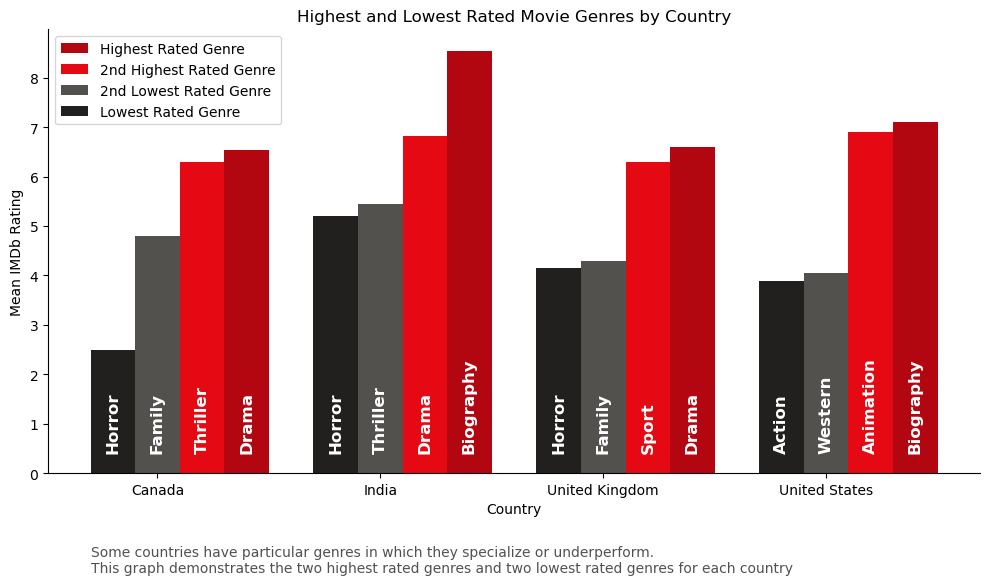

In [659]:
data = {
    'country': countries,
    'genrerank': ['Lowest Rated Genre', '2nd Lowest Rated Genre', '2nd Highest Rated Genre', 'Highest Rated Genre', 
                  'Lowest Rated Genre', '2nd Lowest Rated Genre', '2nd Highest Rated Genre', 'Highest Rated Genre',
                  'Lowest Rated Genre', '2nd Lowest Rated Genre', '2nd Highest Rated Genre', 'Highest Rated Genre', 
                  'Lowest Rated Genre', '2nd Lowest Rated Genre', '2nd Highest Rated Genre', 'Highest Rated Genre'],
    'IMDb': rat
}

df = pd.DataFrame(data)

countriesuni = df['country'].unique()
genrank = df['genrerank'].unique()

w = 0.2
x1 = range(len(countriesuni))

def get_color(labels):
    if labels == 'Lowest Rated Genre':
        return '#221F1F'
    elif labels == '2nd Lowest Rated Genre':
        return '#52514e'
    elif labels =='2nd Highest Rated Genre':
        return '#E50914'
    else:
        return '#B20710' 

fig, ax = plt.subplots(figsize=(10, 6))

for i, rank in enumerate(genrank):
    values = df[df['genrerank'] == rank]['IMDb']
    labels=f'{rank}'
    colors2=get_color(labels)
    ax.bar([pos + i * w for pos in x1], values, w, label=labels, color=colors2)
    
ax.set_xlabel('Country')
ax.set_ylabel('Mean IMDb Rating')
ax.set_xticks([pos + w for pos in x1])
ax.set_xticklabels(countriesuni)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Highest and Lowest Rated Movie Genres by Country')

ax.text(s="Some countries have particular genres in which they specialize or underperform.\nThis graph demonstrates the two highest rated genres and two lowest rated genres for each country", x=-.1, y=-2, size=10, color='#52514e')

genre_labels = list(top2_bot2['imdb_genre'])

genre_labels.insert(4,'')
genre_labels.insert(9,'')
genre_labels.insert(14,'')

for i, v in enumerate(genre_labels):
    ax.text(.01*i*20, .4, v, color='white', fontsize=12, ha='center', va='bottom', fontweight = 'bold', rotation=90)

plt.tight_layout()
plt.show()

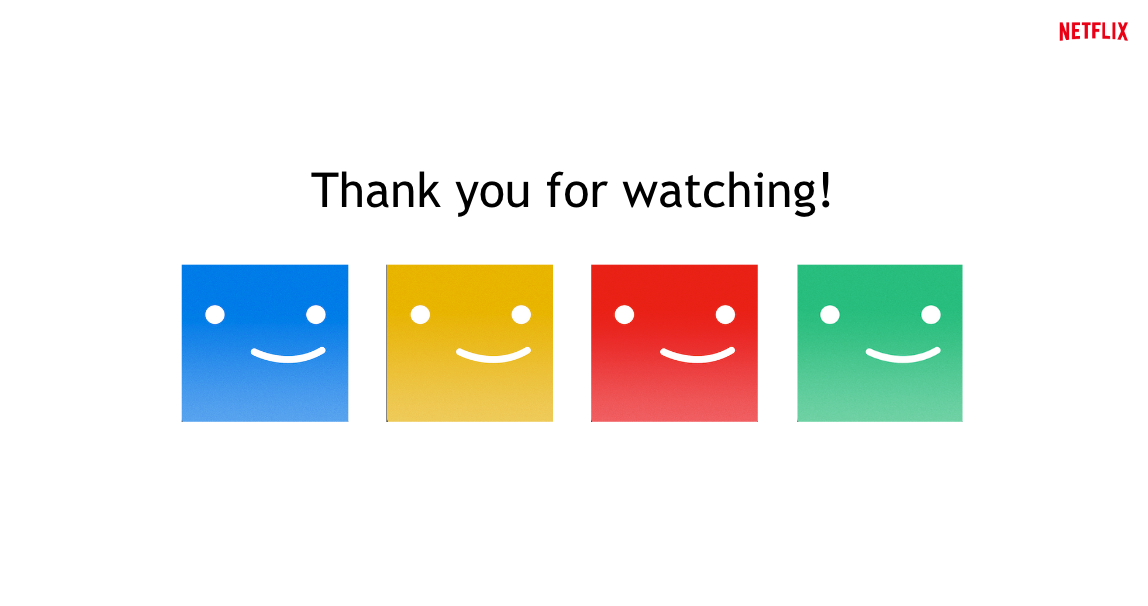

**The End!**

Thank you for reading this notebook. I hope you found this analysis interesting and useful.

Please upvote if you liked the analysis. It will motivate me to do better :)

**Check the powerpoint presentation of this analysis on the link below:**

https://github.com/Shagun-25/Netflix-Data-Analysis/blob/main/Netflix%20Analysis.pptx